In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [5]:
X, y = load_iris(return_X_y=True, as_frame=True)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y.head()


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

# note, check out instructions as you are missing something

What I first want to do is try k means with different ks from 2 to 8, save the inertia and the k and plot it to see which is may be the best.  This will be time consuming

x is k
y is inertia, need a kx2 matrix

In [8]:
results = np.empty((7,2))

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
for k in range(2,9):
    kmeans = KMeans(k)
    kmeans.fit(X)
    results[k-2,0]=k
    results[k-2,1] = kmeans.inertia_

<AxesSubplot:>

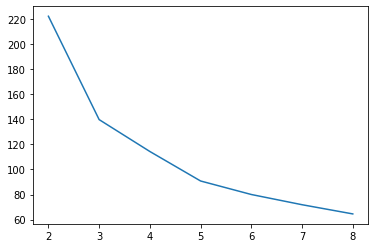

In [14]:
sns.lineplot(x=results[:,0], y=results[:,1])

I'm not sure if I'm interpretting this correct.  Is 3 or 5 the elbow? As the lesson did three, I will try 5.

In [15]:
kmeans = KMeans(5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [16]:
labels = kmeans.labels_

In [17]:
pca = PCA(2)

In [21]:
X_2d = pca.fit_transform(X)

In [26]:

# pd.DataFrame({'x':X_2d[:,0],'y':X_2d[:,1],'labels':labels,'true':y})
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=labels,style=y)

,x,y,labels,true
0,-2.264703,0.480027,0,0
1,-2.080961,-0.674134,3,0
2,-2.364229,-0.341908,3,0
3,-2.299384,-0.597395,3,0
4,-2.389842,0.646835,0,0
...,...,...,...,...
145,1.870503,0.386966,4,2
146,1.564580,-0.896687,1,2
147,1.521170,0.269069,1,2
148,1.372788,1.011254,4,2
